# Calculo de $\tau$ considerando las "Trampas"

Ahora, vamos a suponer que la NP posee de forma intrinsica "trampas" (que a los efectos prácticos son dopantes propios de la NP). 

Nº de trampas: 10, ..., 100  
$R_{0_{trampas}} = 1, ..., 5$

In [1]:
import sys
sys.path.append('../')

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica']})
rc('text', usetex=True)

%matplotlib inline

import ten

In [2]:
# Trampas
R_trampas = [1, 3, 5]
num_trampas = [10, 30, 60, 100]

# Propiedades de la NP
r = 15
L_D = 50
tau_D = 0.333
epsilon = 1
num_exc = 30000
#num_acceptors = num_trampas
#R_Forster = R_trampas

cnt = 0
out = np.zeros((12, num_exc))
prop = np.zeros((12, 2))
for r_foster in R_trampas:
    for num in num_trampas:
        nano_particle = ten.NanoParticle(r,
                                         0, 
                                        num,
                                        tau_D,
                                        r_foster,
                                        L_D,
                                        epsilon,
                                        'vol')

        # Inicialización del exiton
        simu = ten.Exciton(nano_particle,
                            num_exc,
                            'laser')

        # Propiedades para el plot
        prop[cnt] = r_foster, num

        # Calulamos
        out[cnt] = simu.new_tau()
        cnt += 1
        print('Termino r_foster_trampas =', r_foster, 'num_trampas =', num)

Termino r_foster_trampas = 1 num_trampas = 10
Termino r_foster_trampas = 1 num_trampas = 30
Termino r_foster_trampas = 1 num_trampas = 60
Termino r_foster_trampas = 1 num_trampas = 100
Termino r_foster_trampas = 3 num_trampas = 10
Termino r_foster_trampas = 3 num_trampas = 30
Termino r_foster_trampas = 3 num_trampas = 60
Termino r_foster_trampas = 3 num_trampas = 100
Termino r_foster_trampas = 5 num_trampas = 10
Termino r_foster_trampas = 5 num_trampas = 30
Termino r_foster_trampas = 5 num_trampas = 60
Termino r_foster_trampas = 5 num_trampas = 100


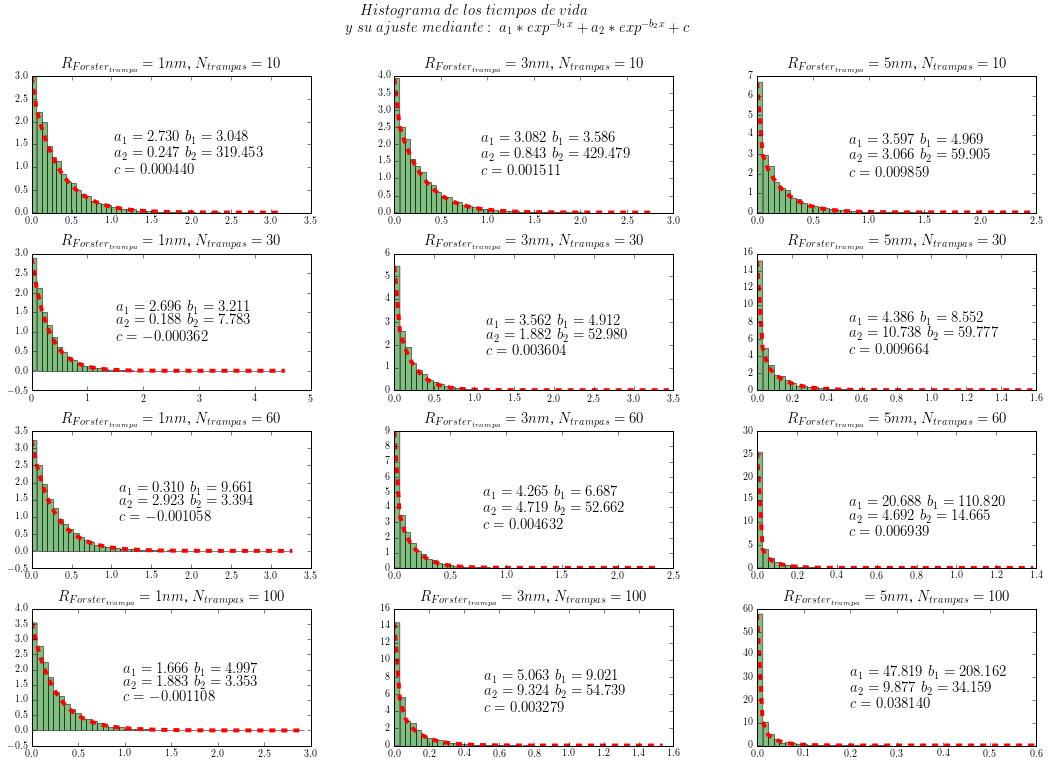

In [38]:
# Función con la cual voy a realizar el ajuste
def func(x, a_1, b_1, a_2, b_2, c):
    return a_1 * np.exp(-b_1 * x) + a_2 * np.exp(-b_2 * x) + c

# Variables necesarias para la ubicación de los plots
cnt1 = 0
cnt2 = 0
cnt3 = 0

# Numeros de bins
num_bins = 50

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    # Numero de sub plot
    new_cnt = cnt1*4 + cnt2
    
    # Histograma
    n, bins, patches = ax.hist(out[new_cnt]*nano_particle.delta_t, num_bins, normed=1, 
                               facecolor='green', alpha=0.5, label="Original Data")
    # Ajuste
    popt, pcov = curve_fit(func, bins[:-1], n)
    ax.plot(bins, func(bins, *popt), 'r--', linewidth=4, label="Fitted Curve")

    #ax.set_xlim([0, 2])
    x_text = bins.max()/3
    y_text = n.max()/2
    y_text_step = n.max()/9
    ax.text(x_text, y_text, r'$a_{1} = %.3f$ $b_{1} = %.3f$' %(popt[0], popt[1]), fontsize=15)
    ax.text(x_text, y_text - y_text_step, r'$a_{2} = %.3f$ $b_{2} = %.3f$' %(popt[2], popt[3]), fontsize=15)
    ax.text(x_text, y_text - 2*y_text_step, r'$c = %.6f$' %(popt[4]), fontsize=15)
    ax.set_title(r'$R_{Forster_{trampa}}=%.0fnm$, $N_{trampas}=%.0f$' 
              %(prop[new_cnt][0], prop[new_cnt][1]), fontsize=15)
    
    # Variables para ubicar los sub plots
    cnt1 += 1
    cnt3 += 1
    if cnt3 == 3:
        cnt1 = 0
        cnt3 = 0
        cnt2 += 1
        
fig.suptitle(r'$Histograma\; de\; los\; tiempos\; de\; vida\\y\; su\; ajuste\; mediante:\; a_{1}*exp^{-b_{1}x}+a_{2}*exp^{-b_{2}x}+c$', fontsize=15)
plt.show()

In [1]:
#Este css esta basado en el de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = 'css/personal.css'
HTML(open(css_file, "r").read())

##### Licencia
El código esta licenciado bajo MIT.

La documentación bajo:

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">TEN</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Laboratorio de Microscopia Óptica Avanzada - UNRC</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/pewen/ten" rel="dct:source">https://github.com/pewen/ten</a>